In [2]:
import pandas as pd
data = pd.DataFrame([
    ['green', 'M', 10.1, 'class_1'],
    ['red', 'S', 22, 'class_2'],
    ['blue', 'XL', 15, 'class_1'],
    ['yellow', 'L', 20, 'class_2']
])

data.columns = ['color', 'size', 'price', 'label']

In [6]:
data

,color,size,price,label
0,green,M,10.1,class_1
1,red,S,22.0,class_2
2,blue,XL,15.0,class_1
3,yellow,L,20.0,class_2


 - pd.factorize() 는 2가지 값을 반환한다.
 - 첫번째 값은 정수로 인코딩된 값, 두번째 값은 인코딩된 범주

In [3]:
y_encoded, y_class = pd.factorize(data['label'])

In [4]:
y_encoded

array([0, 1, 0, 1], dtype=int64)

In [8]:
max_cat = np.max(y_encoded)+1
max_cat

2

In [9]:
avg_array = np.zeros(max_cat)
avg_array

array([0., 0.])

In [5]:
y_class

Index(['class_1', 'class_2'], dtype='object')

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

def correlation_ratio(catogories, measurements):
    fcat, _ = pd.factorize(catogories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()] # i 번 값을 나열
        n_array[i] = len(cat_measures) # i번의 갯수
        y_avg_array[i] = np.average(cat_measures) # i 번의 평균
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [13]:
path_train = "https://raw.githubusercontent.com/jvanelteren/housing/master/datasets/train.csv"
path_test = "https://raw.githubusercontent.com/jvanelteren/housing/master/datasets/test.csv"
train = pd.read_csv(path_train)
final_test = pd.read_csv(path_test)
print(train.shape, final_test.shape)

(1460, 81) (1459, 80)


In [15]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
corr = train.corr()[y_col]
corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

SalePrice
num_x :  ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']
cat_x :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Garag

<AxesSubplot:>

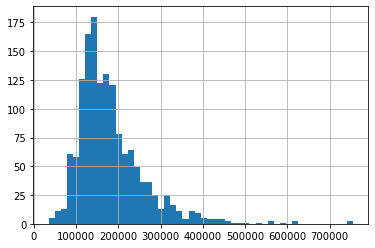

In [14]:
y_col = (set(train.columns) - set(final_test.columns)).pop()
print(y_col) # SalePrice
corr = train.corr()[y_col]
corr = corr.sort_values(ascending = False)
num_x = list(corr.index)[1:]
print('num_x : ', num_x)

cat_x = [col for col in final_test.columns if final_test[col].dtype =='object']
print('cat_x : ', cat_x)
cat_x.sort(key = lambda x: -correlation_ratio(train[x],train[y_col]))


print(train.shape)
train_x = train.drop([y_col], axis = 1)
train_y = train.loc[:, y_col]

train[y_col].hist(bins = 50)

In [17]:
#  고유값의 총 갯수
train[cat_x].nunique()

Neighborhood     25
ExterQual         4
KitchenQual       4
BsmtQual          4
Foundation        6
GarageFinish      3
HeatingQC         5
GarageType        6
BsmtFinType1      6
MasVnrType        4
Exterior2nd      16
Exterior1st      15
SaleType          9
SaleCondition     6
BsmtExposure      4
MSZoning          5
HouseStyle        8
LotShape          4
CentralAir        2
Electrical        5
FireplaceQu       5
RoofStyle         6
PavedDrive        3
BldgType          5
Condition1        9
RoofMatl          8
BsmtCond          4
LandContour       4
GarageQual        5
GarageCond        5
ExterCond         5
LotConfig         5
Functional        7
Heating           6
Condition2        8
BsmtFinType2      6
Fence             4
PoolQC            3
Alley             2
LandSlope         3
Street            2
MiscFeature       4
Utilities         2
dtype: int64

In [18]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Skewness: 1.882876
Skewness: 0.121347


<AxesSubplot:>

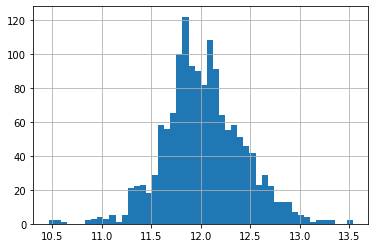

In [19]:
print("Skewness: %f" % train[y_col].skew())
train[y_col] = np.log1p(train[y_col])
print("Skewness: %f" % train[y_col].skew())
train[y_col].hist(bins =50)

In [24]:
cat_x = [(col, round(-correlation_ratio(train[col], train[y_col]), 2)) for col in final_test.columns if final_test[col].dtype =='object']
cat_x.sort(key = lambda x:x[1])
print('Categorical Features with highest correlation ratio')
cat_x[:10]

Categorical Features with highest correlation ratio


[('Neighborhood', -0.76),
 ('ExterQual', -0.68),
 ('KitchenQual', -0.67),
 ('BsmtQual', -0.64),
 ('Foundation', -0.55),
 ('GarageFinish', -0.52),
 ('HeatingQC', -0.48),
 ('GarageType', -0.48),
 ('MasVnrType', -0.44),
 ('Exterior1st', -0.43)]

In [25]:
corr  = train.corr()[y_col]
corr = corr.sort_values(ascending=False)
print('Numeric features with highest correlation')
corr[:10]

Numeric features with highest correlation


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

# Exploration : Quantitative Variables

In [31]:
from altair.expr import datum
import altair as alt
def gen_char(name):
    return alt.Chart(path_train).mark_point(
    color = 'red',
        opacity = 0.1,
        size = 1
    ).encode(
    x = alt.X(name+':Q', scale = alt.Scale(zero=False)),
    y = 'SalePrice:Q'
    ).properties(
    width = 150,
    height = 150
    )

subplts = []
for name in num_x:
    subplts.append(gen_char(name))
plots_per_row = 7
hconcat = [alt.hconcat(*subplts[i:i+plots_per_row]) for i in range(0, len(subplts), plots_per_row)]
alt.vconcat(*hconcat)

alt.VConcatChart(...)

In [53]:
num_x

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr',
 'SalePrice',
 'SalePrice',
 'SalePrice']

In [52]:
brush = alt.selection(type = 'interval', resolve = 'global')
base = alt.Chart(path_train).mark_point(opacity = 0.1, size = 2).encode(
        y = 'SalePrice:Q',
        
        color = alt.condition(brush, alt.ColorValue('red'), alt.ColorValue('green')),
        ).add_selection(brush).properties(width= 140, height = 140)
#print(y)
num_x.append('SalePrice')
subplts = []

for name in num_x:
    subplts.append(base.encode(alt.X(name+":Q", scale = alt.Scale(zero=False))))
plots_per_row = 7
hconcat = [alt.hconcat(*subplts[i:i+plots_per_row]) for i in range(0,len(subplts), plots_per_row)]
alt.vconcat(*hconcat)
    

alt.VConcatChart(...)

In [50]:
train.shape

(1460, 81)

In [45]:
def gen_chart(name):
    chart = alt.Chart(path_train).mark_bar().encode(
    
    x = alt.X(name+':N', bin = False),
    y = 'count()',
    color = alt.condition(brush, alt.ColorValue('red'), alt.ColorValue('gray'))
    ).properties(
    width=140, height = 30
    ).add_selection(brush)
    
    price = alt.Chart(path_train).mark_boxplot().encode(
    x=alt.X(name+':M'),
    y='SalePrice:Q',
    color=alt.condition(brush, alt.ColorValue('red'),alt.ColorValue('gray'))
    ).properties(
    width=  140, height = 140). add_selection(brush)
    return price & chart

brush = alt.selection(type = 'interval', resolve = 'global')

subplts = []
for name in cat_x:
    subplts.append(gen_chart(name))
    
plots_per_row = 7
hconcat =[alt.hconcat(*subplts[i:i+plots_per_row]) for i in range(0, len(subplts),plots_per_row)]
alt.vconcat(*hconcat)


TypeError: can only concatenate tuple (not "str") to tuple

In [42]:
#import heatmap
#from heatmap import heatmap, corrplot
#from matplotlib import pyplot as plt

import seaborn as sns


plt.figure(figsize = (15, 15))
sns.heatmap(data = [train_y, train_x], annot=True)
            
#corrplot(pd.concat([train_y, train_x], axis = 1).corr())

ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

In [44]:
import aoc
import altair as alt
df = aoc.nan_inspect(train_x).reset_index()
df = df.melt('index', var_name = 'to', value_name='corr')
plt.figure(figsize = (15, 15))
alt.Chart(df).mark_rect().encode(
x = alt.X('index:0', sort = alt.EncodingSortField(field='corr', op='sum', order='descending')),
y = alt.Y('to:0', sort=alt.EncodingSortField(field='corr', op='sum', order='descending')),
color='corr:Q')

ModuleNotFoundError: No module named 'aoc'

In [57]:
#from sklearn.ensemble import RandomForestClassifier
from fastai2.tabular.all import *
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv(path_train)
final_test = pd.read_csv(path_test)
train['Traintest'] = 'train'
final_test['Traintest'] = 'test'
train.drop(columns='SalePrice', inplace=True)
alldata = pd.concat([train,final_test])

ModuleNotFoundError: No module named 'fastai2'